# Basics of logistic regression

## Import the relevant libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
sns.set()

## Load the data

In [10]:
raw_data = pd.read_csv('2.01.+Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [12]:
# Replace all 'No' entries with 0, all 'Yes' entries with 1
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [15]:
# Create the dependent and independent variable
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

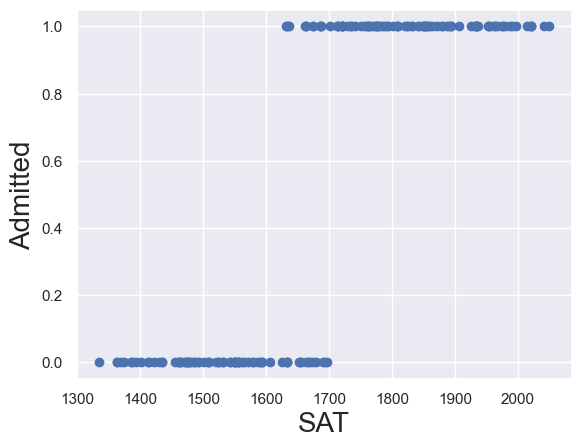

In [20]:
# Create a scatter plot of x1(SAT, no constant) and y (Admitted)
plt.scatter(x1, y, color='C0')

# Don't forget to label your axes!
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot with a regression line

C:\Users\User\AppData\Local\Temp\ipykernel_17096\39218564.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1*results_lin.params[1]+results_lin.params[0]


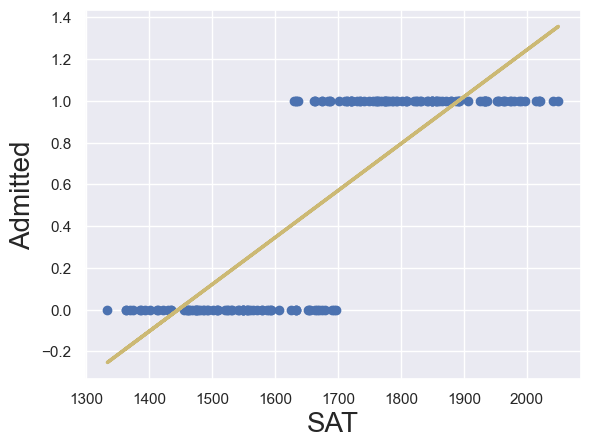

In [24]:
# Create a regression on the data in order to estimate the coefficients and be able to plot a regression line
# The data is NOT LINEAR, so 'linear regression' DOESN'T make sense
x = sm.add_constant(x1)

# Let's call it reg_lin
reg_lin = sm.OLS(y,x)

# Let us segment it into regression and fitted regression (results) as we will use the regression later on
results_lin = reg_lin.fit()

# Create a scatter plot
plt.scatter(x1, y, color = 'C0')

# plot the regression line. The coefficients are coming from results_lin.params
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1, y_hat, lw=2.5, color='C8')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Plot a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


C:\Users\User\AppData\Local\Temp\ipykernel_17096\454240846.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))


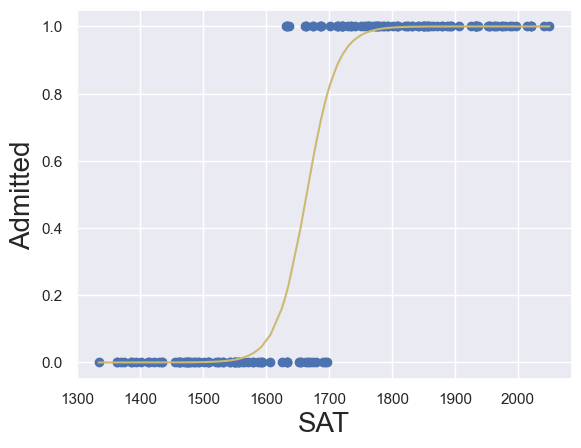

In [31]:
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

def f(x, b0, b1):
    return np.array(np.exp(b0+x*b1) / (1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted, f_sorted, color='C8')
plt.show()